In [1]:
"""This is identical to the two level explicit, it might look different, 
but that's only because we start with many photons"""

## Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.offsetbox as offsetbox
import matplotlib.gridspec as gridspec
import math
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

<Figure size 432x288 with 0 Axes>

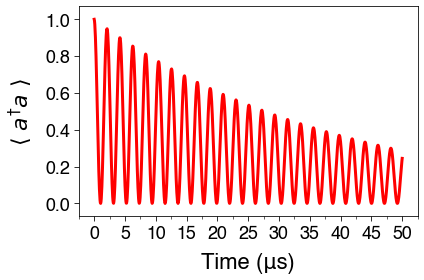

<Figure size 432x288 with 0 Axes>

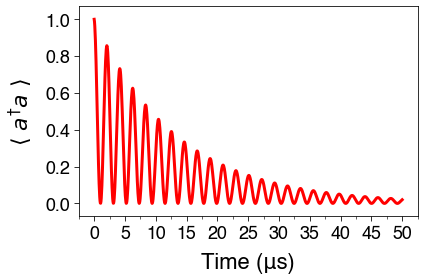

<Figure size 432x288 with 0 Axes>

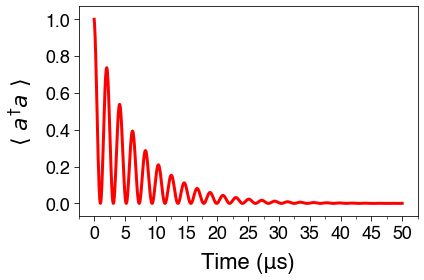

<Figure size 432x288 with 0 Axes>

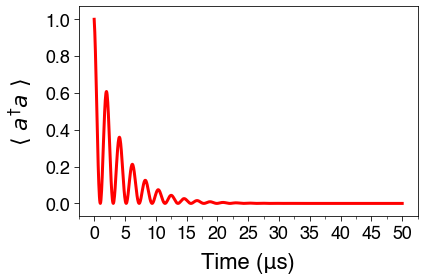

'I understand that if there is a close phase between all the photons, then they will phase with one antoher\nbut, why, if supposedly all the photons are not in phase in a fock state, do we see no interferrence at all?'

In [2]:
## Dimensional operators
cav_dim = 2 # types of photons there can exist (thermal or participaitn gin excitation)
atm_dim = 2 # energy levels in atom, 2 for TLS
I_cav = qeye(cav_dim) # identity matrix matching dimension of radiation field
I_atom = qeye(atm_dim) # identity matrix matching dimension of spin system

## Atomic spin system operators
sigmap = tensor(sigmap(), I_cav)
sigmam = tensor(sigmam(), I_cav)
sigmaz = tensor(sigmaz(), I_cav)

## Photon operators
adag = tensor(I_atom, create(cav_dim)) # order of arguments is important and is consistant with the spin operators                
a = tensor(I_atom, destroy(cav_dim))

## Physical constants
N = 7e14 # number of two-level systems
wa = 2 * np.pi * 1.45e3 # atom transition frequency (w_excited - w_ground) (MHz) allows is to work in micro seconds
wc = 2 * np.pi * 1.45e3 # cavity frequency with vacuum field energy set to zero (zero-point energy) (MHz)
gs = 2 * np.pi * 0.042e-6 # single spin–photon coupling strength (MHz)
g = 1.5 #2 * np.pi * 1.1 # test spin-photon couling strength ~ np.sqrt(tls_num)*g, experimetnally it's 1.1 though. 

#Kc =  0.2 #2 * np.pi * 0.18 # cavity mode decay rate (MHz)
#Ks =  0.2 #2 * np.pi * 0.11 # spin dephasing rate (MHz)
#gamma = 0.2 #2 * np.pi * 0.0177 # spin-lattice relaxation rate (MHz)

# Tuneable parameters
use_rwa = True # set = True to use Rotating Wave Approximation
n_th = 0 # avg number of thermal bath excitation (nhf=kT)

## Initial quantum states
psi_atm = np.sqrt(0)*basis(2, 0) + np.sqrt(1)*basis(2, 1) # atom initially stat in ground state
rho_atm = ket2dm(psi_atm)
psi_phot = np.sqrt(1)*fock(cav_dim, 1) # exactly 5 photons in the cavity out of a possible 10
rho_phot = ket2dm(psi_phot)
psi0 = tensor(psi_atm, psi_phot)
rho0 = tensor(psi_atm, psi_phot)

## Assembling the Hamiltonian
hbar = 1.0 # natural units
HA = 0.5 * hbar * wa * sigmaz # atomic part
HF = hbar * wc * (adag*a) # field part

if use_rwa:
    HI = hbar * (sigmap * a + sigmam * adag) # interaction part in the RWA
else:
    HI = hbar * ((sigmap + sigmam)*(a + adag)) # interaction part not using RWA
H = HA + HF + g*HI

## Collapse operators
c_ops = []

for Kc in [0.05, 0.1, 0.15, 0.2]:
    Ks = 0

    if n_th == 0.0:
        c_ops.append(np.sqrt(Kc) * a) # cavity relaxation at absolute zero
        #c_ops.append(np.sqrt(gamma) * sigmam) # spin-lattice relaxation
        #c_ops.append(np.sqrt(Ks) * sigmaz) # spin dephasing
    else:
        c_ops.append(np.sqrt(Kc * n_th) * a) # cavity excitation, if temperature > 0               

    #C = round(4*g**2 / (Kc*Ks))
    
    ## simulation duration and master equation solver
    time = 50
    steps = 1000
    tlist = np.linspace(0, time, steps)
    result = mesolve(g*HI, psi0, tlist, c_ops, e_ops= [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=100000))


    ## Visualization 
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots(1)
    ax.plot(tlist, result.expect[0], color='r', linestyle='-', linewidth=3)
    plt.ylim([-0.07, 1.07])
    #plt.title('Cavity photon number', fontsize = 22)
    plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', labelpad = 10, fontsize = 22)
    plt.xlabel('Time (μs)', labelpad = 10, fontsize = 22)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xticks(np.arange(0, time+1, 5))
    ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', length=3)
    
    #ob = offsetbox.AnchoredText(r'$C = $' + str(C), loc=1, borderpad = 1.5, prop=dict(size=22))
    #ob.patch.set(boxstyle='square,pad=0.05', alpha=1)
    #ax.add_artist(ob)
    
    plt.tight_layout()
    plt.savefig('adag a' + str(Kc) + str(Ks) + '.png', format = 'png', dpi = 900)

    
   #dfds
     #plt.figure(figsize=(6,4))
#     fig, ax = plt.subplots(1)
#     plt.plot(tlist, result.expect[1], color='k', linestyle='-', linewidth=3)
#     plt.ylim([-1.07, 1.07])
#     #plt.title('Population Inversion', fontsize = 22)
#     plt.ylabel(r'$\langle\ \sigma_z \ \rangle$', labelpad = 10, fontsize = 22)
#     plt.xlabel('Time (μs)', labelpad = 10, fontsize = 22)
#     plt.xticks(fontsize = 18)
#     plt.yticks(fontsize = 18)
#     plt.xticks(np.arange(0, time+1, 5))
#     plt.yticks(np.arange(-1, 1.5, 0.5))
#     ax.xaxis.set_minor_locator(MultipleLocator(2.5))
#     ax.yaxis.set_minor_locator(MultipleLocator(0.25))
#     ax.tick_params(which='major', length=5)
#     ax.tick_params(which='minor', length=3)
    
#     ob = offsetbox.AnchoredText(r'$C = $' + str(C), loc=1, borderpad = 1.5, prop=dict(size=22))
#     ob.patch.set(boxstyle='square,pad=0.05', alpha=1)
#     ax.add_artist(ob)
    
#     plt.tight_layout()
#     plt.savefig('sigmaz' + str(Kc) + str(Ks) + '.png', format = 'png', dpi = 900) 

#     plt.figure(3)
#     plt.plot(tlist, result.expect[2], color='b', linestyle='-', linewidth=3)
#     plt.ylim([-0.07, 1.07])
#     plt.title('Spin-spin correlation', fontsize = 14)
#     plt.ylabel(r'$\langle\ \sigma_+ \sigma_- \ \rangle$', fontsize = 14)
#     plt.xlabel('Time (μs)', labelpad = 10, fontsize = 14)
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
#     plt.tight_layout()
#     plt.savefig('sigmap sigmam' + str(Kc) + str(Ks) + '.png', format = 'png', dpi = 900) 

#     plt.figure(4)
#     plt.plot(tlist, result.expect[3].imag, color='g', linestyle='-', linewidth=3)
#     plt.title('Spin-photon correlation', fontsize = 14)
#     plt.ylabel(r'$\langle\ a^\dag \sigma_- \ \rangle$', fontsize = 14)
#     plt.xlabel('Time (μs)', labelpad = 10, fontsize = 14)
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
#     plt.tight_layout()
#     plt.savefig('adag sigmam' + str(Kc) + str(Ks) + '.png', format = 'png', dpi = 900) 

    plt.show()

"""I understand that if there is a close phase between all the photons, then they will phase with one antoher
but, why, if supposedly all the photons are not in phase in a fock state, do we see no interferrence at all?"""
    

In [3]:
gh = create(2)
ght = tensor(qeye(2), gh)
ght

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]

In [4]:
ght*sigmam

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]